In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyspatialkit.storage.raster.tiledbbackend import TileDbBackend
import numpy as np
from matplotlib import pyplot as plt
import shutil
import tiledb

In [3]:
pts_source = np.array([[0,1], [1,1], [1,0], [0,0]])
pts_dest = np.array([[3,10], [8,10], [8,5], [3,5]])

In [3]:
#backend.close_all_db_connections()
shutil.rmtree('./db')
import os
os.mkdir('./db')
backend = TileDbBackend([0,0,200,200], 1, float, './db', )

In [4]:
img = np.zeros((100,100, 1))
img[50, :] = 1
#plt.imshow(img)

In [5]:
backend.write_data([0,0,100,100], img)

In [6]:
backend.update_pyramid()

/workspaces/pyspatialkit/pyspatialkit/storage/raster/tiledbbackend.py:75: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  img = img.view((self.dtype, self.num_bands))


In [7]:
res = backend.get_data([0,0,100,100], [25,25])

/workspaces/pyspatialkit/pyspatialkit/storage/raster/tiledbbackend.py:89: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  res = res.view((self.dtype, self.num_bands))


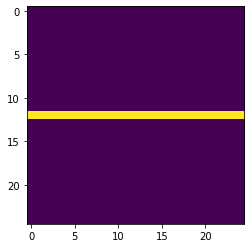

In [8]:
plt.imshow(res)

/opt/conda/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  """Entry point for launching an IPython kernel.


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.03125   , 0.03125   , 0.03125   , 0.00390625, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

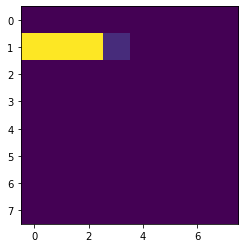

In [17]:
test = backend.layers[5][1][:,:].view((np.dtype(float), 1))
plt.imshow(test)